# Dockless Scooter Bayesian Network

Loading bayesnet and data.

In [1]:
from dockless_model import DocklessBayesNet
from dockless_data import *
import pandas as pd

In [2]:
dl_model = DocklessBayesNet()
dl_model.load_data()

Loading Scooter Data ...


/Users/sanjayyepuri/.pyenv/versions/anaconda3-5.3.1/envs/OSMNX/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  


Scooter Data Loaded.
Loading Census Data ...
Census Data Loaded.
Loading Class Data ...
Cleaning Class Data ...
Finished Cleaning Class Data.
Cleaning Scooter Data ...
(1452803, 18) (1446243, 18)
(1327537, 18)


/Users/sanjayyepuri/Documents/Source/343h/traffic/notebooks/dockless_data.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  scooter_data['Start Time'] = start_time
/Users/sanjayyepuri/Documents/Source/343h/traffic/notebooks/dockless_data.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  scooter_data['End Time'] = end_time
/Users/sanjayyepuri/Documents/Source/343h/traffic/notebooks/dockless_data.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Finished Cleaning Scooter Data.
Transforming Endpoints ...
Finished Transforming Endpoints.


Precomputing conditional probabilities. This may take a while.

In [3]:
dl_model.compute_start_region_distribution()

Started Building EER
Completed Building EER
Started Building BUR
Completed Building BUR
Started Building UTC
Completed Building UTC
Started Building ECJ
Completed Building ECJ
Started Building CPE
Completed Building CPE
Started Building RLM
Completed Building RLM
Started Building MEZ
Completed Building MEZ
Started Building CBA
Completed Building CBA
Started Building GSB
Completed Building GSB
Started Building ART
Completed Building ART
Started Building ETC
Completed Building ETC
Started Building CMA
Completed Building CMA
Started Building RLP
Completed Building RLP
Started Building JGB
Completed Building JGB
Started Building PHR
Completed Building PHR
Started Building SZB
Completed Building SZB
Started Building WAG
Completed Building WAG
Started Building PAR
Completed Building PAR
Started Building PAI
Completed Building PAI
Started Building GDC
Completed Building GDC
Started Building FNT
Completed Building FNT
Started Building WMB
Completed Building WMB
Started Building GOL
Completed B

In [4]:
dl_data = dl_model.data

## Comparing Original Data Distribution and Modeled One

In [5]:
sampled_data = []
for i in range(8, 17):
    dl_model.compute_distance_distribution(i)
    sampled_data.extend(dl_model.gibbs_sample(100, i))

0.685603141784668
0.01718489170074463
0.6720802783966064
0.014723689556121826
0.6712419986724854
0.014886059761047364
0.7243988513946533
0.0221610689163208
0.7088830471038818
0.02540498971939087
0.6947081089019775
0.016263871192932128
0.6786961555480957
0.020769050121307375
0.6792500019073486
0.023360130786895753
0.7101888656616211
0.017398972511291504


In [11]:
df = pd.DataFrame(sampled_data, columns=['class_time', 'start_time', 'building', 'distance', 'tract_start'])
sampled_freqs = df.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
total = float(sum(sampled_freqs['count']))
sampled_freqs['proportion'] = sampled_freqs['count'].apply(lambda x: x/total)
sampled_freqs

,tract_start,count,proportion
0,000204,21,0.023333
1,000401,184,0.204444
2,000500,87,0.096667
3,000603,281,0.312222
4,000604,299,0.332222
5,000700,28,0.031111


In [12]:
original_freqs = dl_data.transformed_endpoints.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
total = float(sum(original_freqs['count']))
original_freqs['proportion'] = original_freqs['count'].apply(lambda x: x/total)
original_freqs

,tract_start,count,proportion
0,000204,6680,0.013659
1,000401,81055,0.165741
2,000500,33338,0.068169
3,000603,177054,0.362039
4,000604,163038,0.333379
5,000700,27882,0.057013


In [9]:
df.hist(bins=15, column='distance')
dl_data.transformed_endpoints['distance'] = dl_data.transformed_endpoints['Trip Distance'].apply(lambda x: int(x))
dl_data.transformed_endpoints.hist(bins = 15, column = 'distance')
dl_data.transformed_endpoints['distance']

29          444
68            0
70         1311
77          905
84         1238
90         1090
92          369
96         1183
99         1331
106        1118
113         757
116         983
131        1073
200         633
226        1613
279         418
286         894
371          54
376         704
387         580
403        1365
413        1249
452        1266
476        1014
526         609
557         818
560         671
575         497
583         573
601        1277
           ... 
4561466     672
4561469     855
4561474     789
4561479     715
4561482    2215
4561491    1940
4561504     609
4561512    1129
4561519     456
4561521    1042
4561522     623
4561535     599
4561567    1024
4561572    1235
4561574    1418
4561578    1718
4561612     785
4561617     889
4561622     325
4561623     961
4561624       0
4561625    1103
4561631    1560
4561653    1413
4561658     502
4561710    1754
4561767     712
4561770    1110
4561779     512
4561806     706
Name: distance, Length: 

In [19]:
from scipy.stats import chisquare

chisquare(sampled_freqs['proportion'], f_exp=original_freqs['proportion'])


Power_divergenceResult(statistic=0.04642908808938234, pvalue=0.9999756987782261)

## Plotting the Most Popular Routes

In [330]:
%reload_ext autoreload
%autoreload 2
from simulator import *
import osmnx as ox

In [335]:
sim = Simulator()
sim.get_graph()
#original_map = ox.graph_from_address(central_address, distance=1500, network_type='bike')

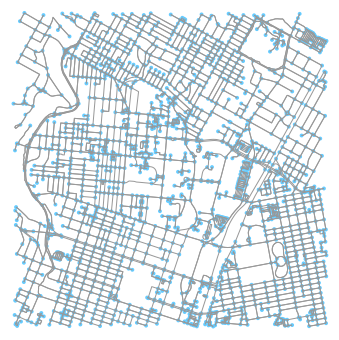

(<Figure size 499.298x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x177409ef0>)

In [336]:
ox.plot_graph(sim.map)

In [337]:
sim.simulate(sampled_data)

In [338]:
max_count = -1


edges = list(sim.map.edges)

for i in range(len(edges)):
    e = edges[i]
    sim.map.edges[e]['count'] = float(sim.map.edges[e]['count'])
    
    if  sim.map.edges[e]['count'] <= 5:
        sim.map.remove_edge(*e)
        
    
print(len(sim.map.edges))


450


In [339]:
for e in sim.map.edges:
    print(sim.map.edges[e]['count']) 

42.0
33.0
38.0
6.0
8.0
9.0
11.0
44.0
72.0
8.0
23.0
11.0
11.0
74.0
9.0
49.0
233.0
50.0
134.0
19.0
74.0
63.0
11.0
7.0
21.0
19.0
19.0
10.0
14.0
8.0
7.0
11.0
6.0
6.0
19.0
13.0
13.0
45.0
32.0
9.0
7.0
7.0
13.0
14.0
11.0
18.0
14.0
8.0
12.0
14.0
26.0
300.0
6.0
16.0
136.0
198.0
33.0
34.0
189.0
11.0
60.0
37.0
7.0
6.0
7.0
24.0
14.0
18.0
26.0
16.0
24.0
9.0
6.0
12.0
19.0
12.0
15.0
76.0
6.0
11.0
71.0
14.0
19.0
29.0
28.0
9.0
10.0
10.0
7.0
130.0
9.0
30.0
9.0
6.0
26.0
20.0
9.0
14.0
12.0
9.0
6.0
10.0
23.0
6.0
18.0
15.0
71.0
19.0
29.0
28.0
14.0
12.0
6.0
19.0
10.0
40.0
17.0
9.0
23.0
44.0
10.0
53.0
21.0
9.0
6.0
6.0
30.0
11.0
15.0
9.0
16.0
142.0
99.0
72.0
61.0
22.0
41.0
8.0
34.0
14.0
19.0
15.0
7.0
69.0
136.0
136.0
11.0
121.0
90.0
22.0
59.0
13.0
61.0
11.0
75.0
8.0
59.0
79.0
71.0
19.0
15.0
26.0
9.0
77.0
19.0
69.0
34.0
152.0
47.0
61.0
64.0
47.0
300.0
43.0
171.0
8.0
169.0
130.0
8.0
16.0
13.0
11.0
6.0
124.0
35.0
30.0
134.0
7.0
32.0
29.0
16.0
103.0
124.0
12.0
131.0
142.0
9.0
10.0
33.0
18.0
67.0
16.0
44.0
13.0
9.0

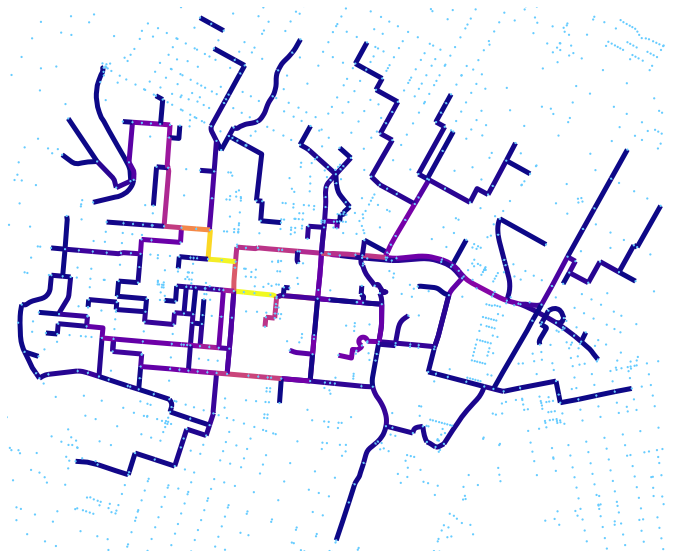

In [346]:
nc = ox.get_edge_colors_by_attr(sim.map, 'count', cmap='plasma', num_bins=100)
fig, ax = ox.plot_graph(sim.map, fig_height=10, edge_color=nc, node_size=5, node_zorder=3, edge_linewidth=5)

In [ ]:
from utils import *
xz = convert_from_lat_long(-97.735322, 30.288374)
print(xz)
print(convert_to_lat_long(xz.x, xz.y))